In [1]:
import numpy as np
import ot
import joblib
import jpype
import jpype.imports
from jpype.types import *
jpype.startJVM(classpath=['../GOW.jar'])
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X_train = joblib.load('../Datasets/SpokenArabicDigit/Cut/X_train.pkl')
X_test = joblib.load('../Datasets/SpokenArabicDigit/Cut/X_test.pkl')
y_train = joblib.load('../Datasets/SpokenArabicDigit/Cut/y_train.pkl')
y_test = joblib.load('../Datasets/SpokenArabicDigit/Cut/y_test.pkl')

print("Train: ", len(X_train))
print("Test: ", len(X_test))

Train:  330
Test:  110


In [3]:
GOW = JClass("GOW")

0 0


<Axes: >

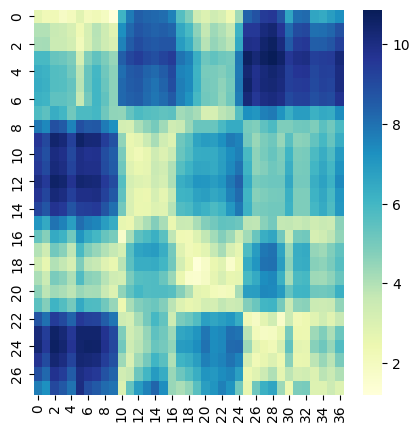

In [4]:
seq1 = np.array(X_test[0])
n = len(seq1)
a = np.ones(n) / n    
seq2 = np.array(X_train[25])
m = len(seq2)
b = np.ones(n) / n  
print(y_test[0], y_train[25])
C = ot.dist(seq1, seq2, metric='minkowski')
plt.figure(figsize=(5,5))
sns.heatmap(C, cmap="YlGnBu", annot=None)

In [5]:
GOOW = GOW(a, b, C, 10, 8, 20, 0.001, 100, "w_slope")
GOOW.GOW_distance_sinkhorn_autoscale()

3.517763120335781

In [6]:
def new_metric(a, seq1, seq2):
    C = ot.dist(seq1, seq2, metric='minkowski')
    # C = C / C.max()
    m = len(seq2)
    b = np.ones(m) / m

    GOOW = GOW(a, b, C, 10, 8, 20, 0.001, 100, "w_slope") # 75.70 65.14 56.34
    # GOOW = GOW(a, b, C, 10, 5, 30, 0.00001, 100, "w_slope") # 60.94 58.25 56.90

    return GOOW.GOW_distance_sinkhorn_autoscale()

In [7]:
y_train

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [8]:
val = []
for i in range(0, 1):
    seq_1 = np.array(X_test[i])
    n = len(seq_1)
    a = np.ones(n) / n    

    for j in range(0, 20):
        val.append(new_metric(a, seq_1, np.array(X_train[j])))

In [9]:
val

[3.474375254648892,
 4.100761241975945,
 4.117632975734103,
 4.287077550639372,
 4.927472510779903,
 5.476635804135807,
 4.856430258503248,
 4.42124153889013,
 5.014960828837754,
 4.722379704869479,
 3.764528326110083,
 4.490429102646039,
 3.529575619763455,
 3.7474673578571847,
 3.3879600567735775,
 4.019158906539337,
 4.161669366027253,
 4.395546189738341,
 3.811379371673556,
 3.7383705116505808]

In [10]:
np.argmin(val)

14

In [11]:
y_train[14]

0